In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df = pd.read_csv('bank_customers_train.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,blue-collar,single,high.school,NaN,no,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
1,52,blue-collar,married,NaN,NaN,yes,no,telephone,jun,thu,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
2,38,services,married,high.school,NaN,no,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
3,44,admin.,married,university.degree,no,yes,no,telephone,oct,wed,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.735,5017.5,yes
4,25,services,divorced,basic.4y,no,yes,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,43,admin.,single,university.degree,no,no,no,cellular,may,tue,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
39184,31,admin.,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
39185,49,blue-collar,married,basic.4y,NaN,no,no,telephone,jun,fri,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,yes
39186,31,admin.,single,university.degree,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39188 non-null  int64  
 1   job             39188 non-null  object 
 2   marital         39188 non-null  object 
 3   education       39188 non-null  object 
 4   default         39188 non-null  object 
 5   housing         39188 non-null  object 
 6   loan            39188 non-null  object 
 7   contact         39188 non-null  object 
 8   month           39188 non-null  object 
 9   day_of_week     39188 non-null  object 
 10  duration        39188 non-null  int64  
 11  campaign        39188 non-null  int64  
 12  pdays           39188 non-null  int64  
 13  previous        39188 non-null  int64  
 14  poutcome        39188 non-null  object 
 15  emp.var.rate    39188 non-null  float64
 16  cons.price.idx  39188 non-null  float64
 17  cons.conf.idx   39188 non-null 

In [30]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000,39188.000000
mean,39.997754,258.125574,2.568720,962.588394,0.173191,0.079787,93.575327,-40.499862,3.618962,5166.920478
std,10.407876,258.683120,2.771971,186.631343,0.495921,1.571619,0.579311,4.631198,1.735424,72.290033
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [138]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']
df[cols] = df[cols].apply(lambda x: x.str.strip().fillna('Unknown'))

In [139]:
df['education'] = df['education'].fillna('Unknown')
df['education']

0              high.school
1                  Unknown
2              high.school
3        university.degree
4                 basic.4y
               ...        
39183    university.degree
39184          high.school
39185             basic.4y
39186    university.degree
39187             basic.9y
Name: education, Length: 39188, dtype: object

In [140]:
df['y'].value_counts(normalize=True)

y
no     0.887338
yes    0.112662
Name: proportion, dtype: float64

In [23]:
df.groupby('job')['y'].value_counts(normalize=True).unstack()

y,no,yes
job,,
admin.,0.870753,0.129247
blue-collar,0.931246,0.068754
entrepreneur,0.914863,0.085137
housemaid,0.899209,0.100791
management,0.886103,0.113897
retired,0.752761,0.247239
self-employed,0.897361,0.102639
services,0.918281,0.081719
student,0.686461,0.313539


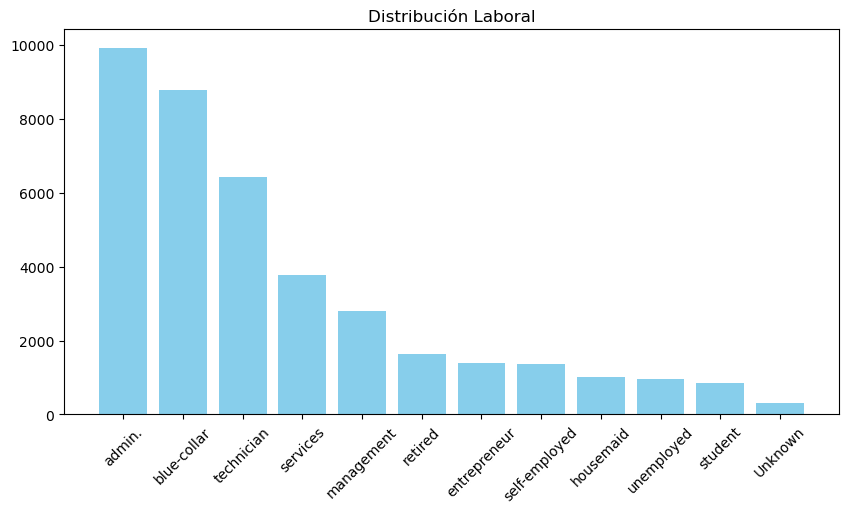

In [44]:
job_counts = df['job'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(job_counts.index, job_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.title('Distribución Laboral')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'blue-collar'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'technician'),
  Text(4, 0, 'self-employed'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'unemployed'),
  Text(7, 0, 'management'),
  Text(8, 0, 'student'),
  Text(9, 0, 'entrepreneur'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'Unknown')])

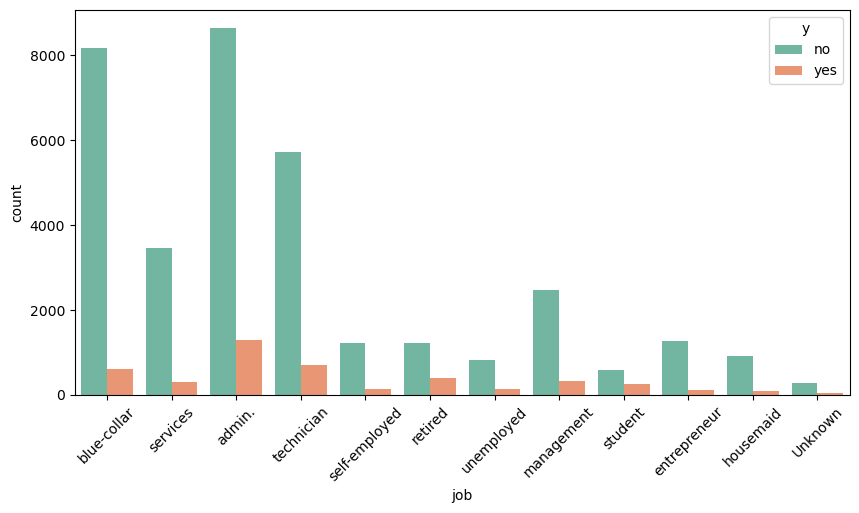

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='job', data=df, hue='y', palette='Set2')
plt.xticks(rotation=45)

Text(0, 0.5, 'Frecuencia')

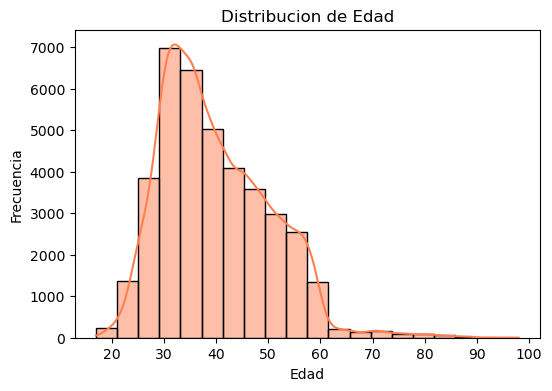

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], bins=20, kde=True, color='coral')
plt.title('Distribucion de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Duracion de llamada vs. Resultado')

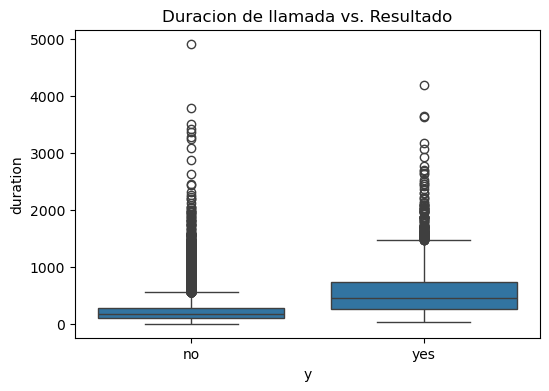

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='y', y='duration', data=df)
plt.title('Duracion de llamada vs. Resultado')

Text(0.5, 1.0, 'Correlacion entre variables numericas')

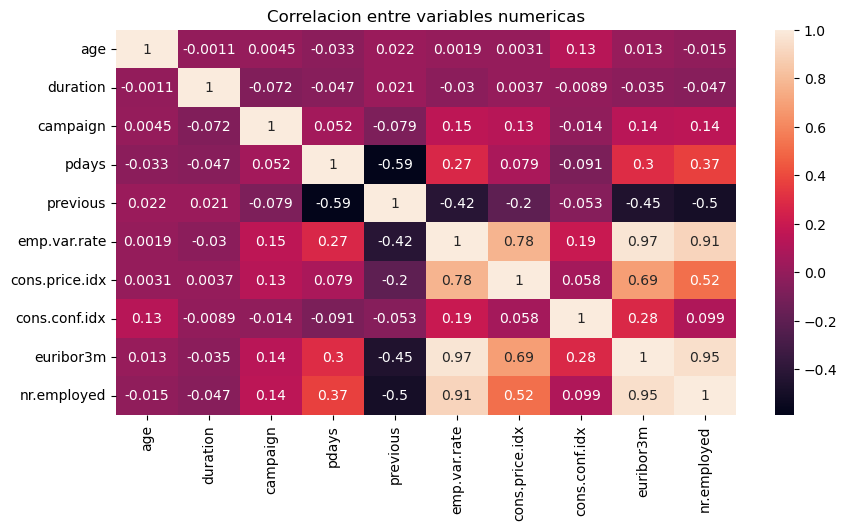

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, )
plt.title('Correlacion entre variables numericas')

Text(0.5, 0, 'Trabajo')

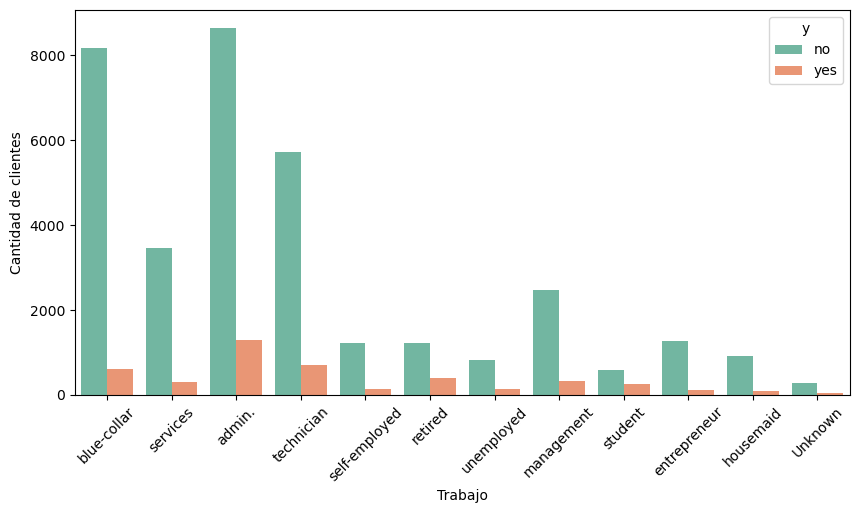

In [95]:
plt.figure(figsize=(10, 5))
sns.countplot(x='job', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de clientes')
plt.xlabel('Trabajo')

Text(0, 0.5, 'Cantidad de clientes')

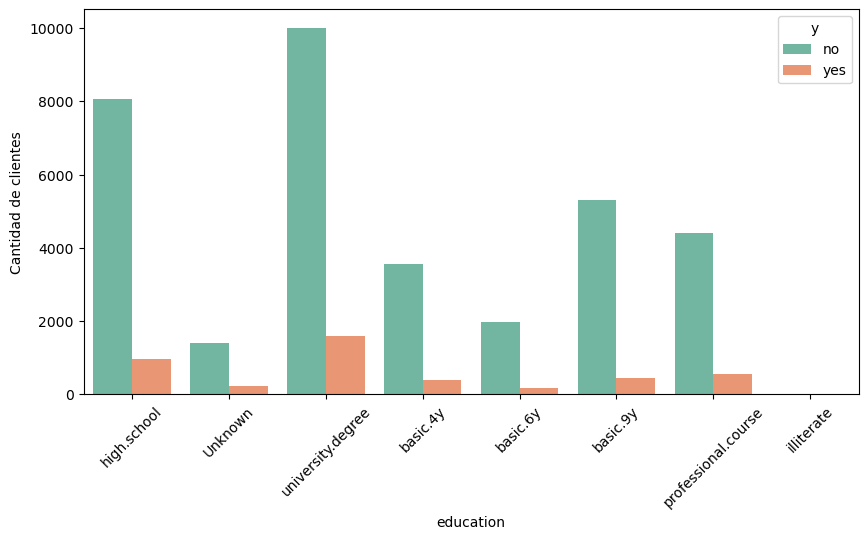

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='education', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de clientes')

Text(0, 0.5, 'Cantidad de clientes')

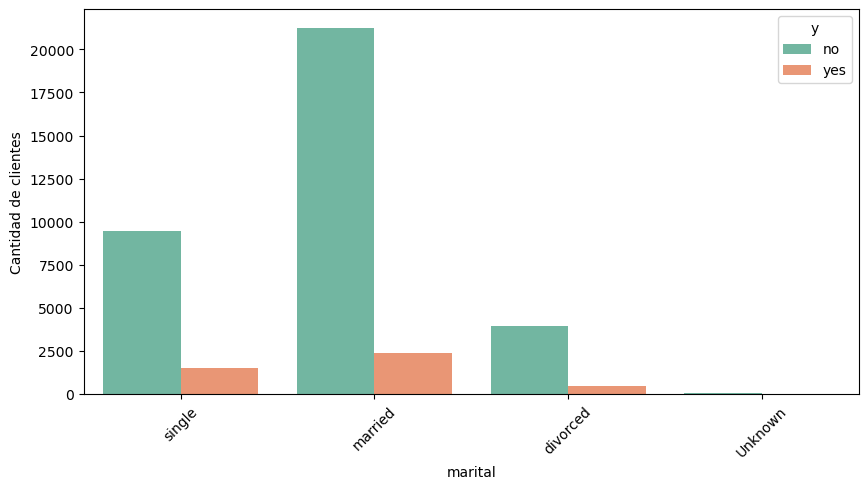

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='marital', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de clientes')

Text(0, 0.5, 'Cantidad de clientes')

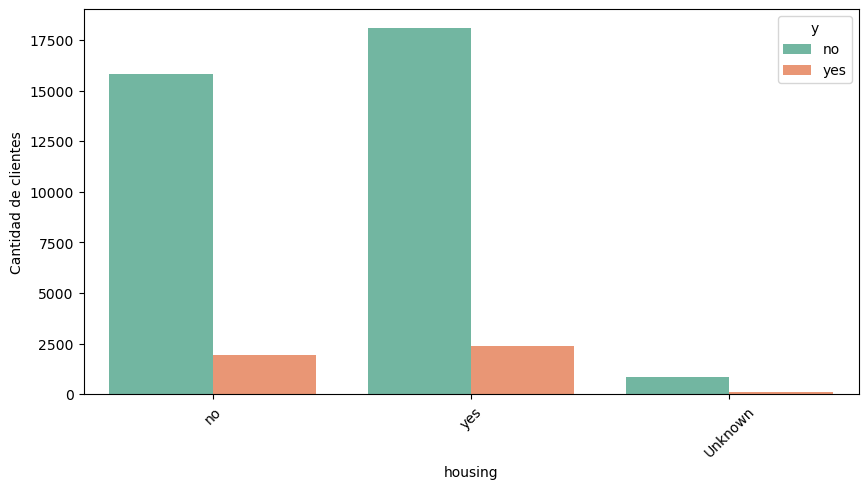

In [64]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='housing', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de clientes')

Text(0, 0.5, 'Cantidad de clientes')

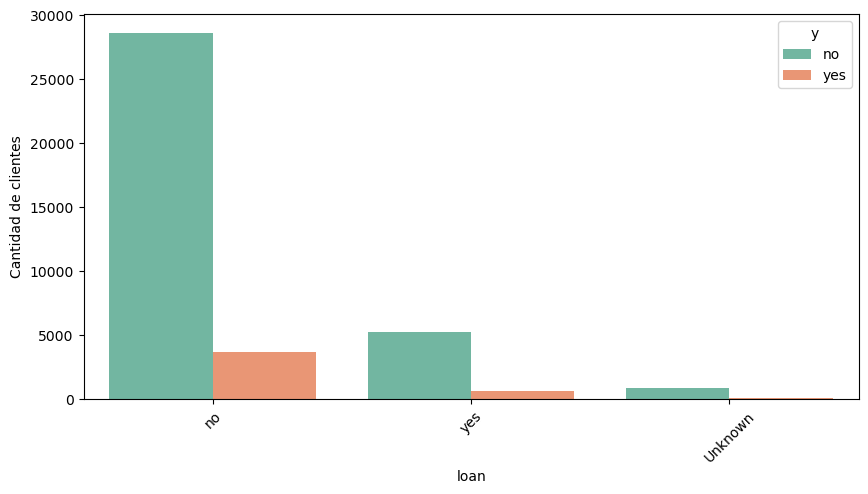

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='loan', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de clientes')

Text(0, 0.5, 'Cantidad de clientes')

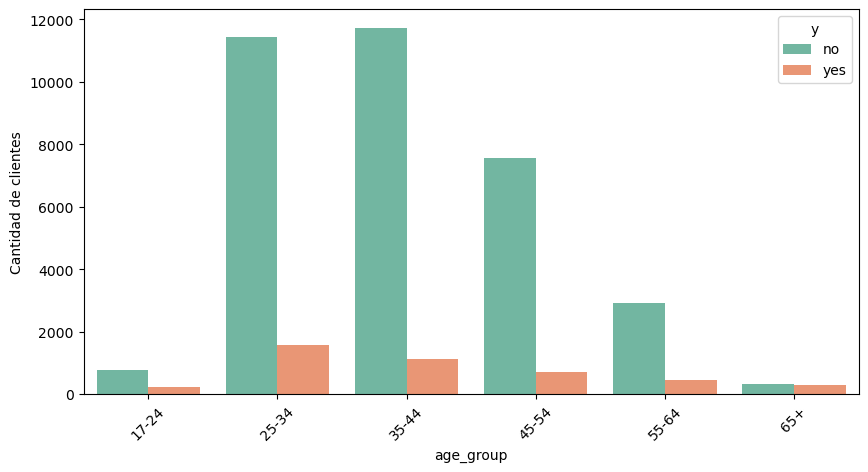

In [141]:
bins = [15, 25, 35, 45, 55, 65, 100]
labels = ['17-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 5))
sns.countplot(x='age_group', hue='y', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de clientes')

Text(0.5, 0, 'Día')

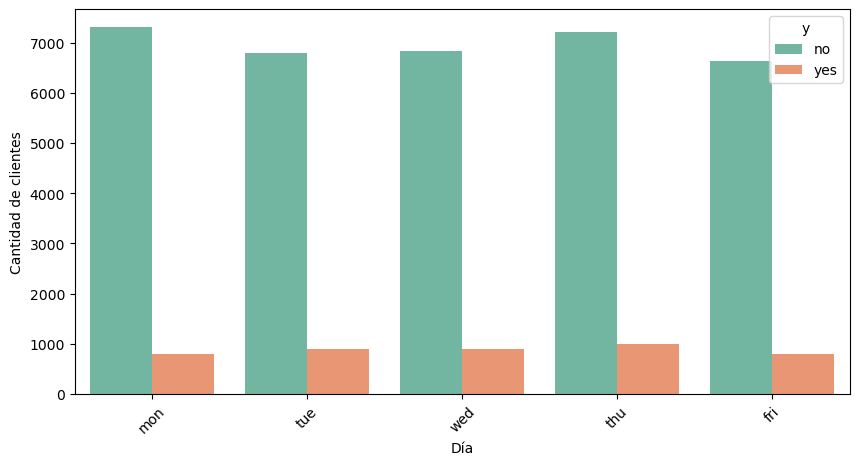

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='day_of_week', hue='y', data=df, order=[
              'mon', 'tue', 'wed', 'thu', 'fri'], palette='Set2')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de clientes')
plt.xlabel('Día')

Text(0.5, 0, 'Día')

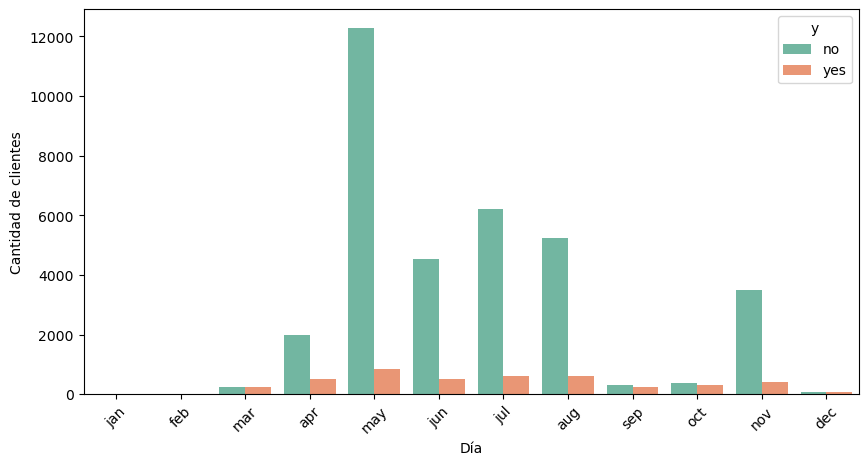

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='month', hue='y', data=df, order=[
              'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette='Set2')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de clientes')
plt.xlabel('Día')

In [123]:
conversion_rate = (df['y'].value_counts(normalize=True)['yes'] * 100)
print(f'Tasa de conversión: {conversion_rate}%')

Tasa de conversión: 11.266203939981628%


In [126]:
df.groupby('age_group')['y'].value_counts(normalize=True).unstack()['yes']*100

/var/folders/c2/yfkd2y_x4qj8vhdk3rg0b2cw0000gn/T/ipykernel_29456/685554859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['y'].value_counts(normalize=True).unstack()['yes']*100


age_group
17-24    23.851417
25-34    12.209525
35-44     8.711886
45-54     8.654079
55-64    13.447361
65+      46.677472
Name: yes, dtype: float64

In [127]:
df.groupby('job')['y'].value_counts(normalize=True).unstack()[
    'yes'].sort_values(ascending=False)*100

job
student          31.353919
retired          24.723926
unemployed       14.641745
admin.           12.924690
Unknown          11.392405
management       11.389685
technician       10.904836
self-employed    10.263930
housemaid        10.079051
entrepreneur      8.513709
services          8.171929
blue-collar       6.875356
Name: yes, dtype: float64

In [128]:
df.groupby('education')['y'].value_counts(normalize=True).unstack()[
    'yes'].sort_values(ascending=False)*100

education
illiterate             23.529412
Unknown                14.640048
university.degree      13.703001
professional.course    11.412497
high.school            10.823945
basic.4y               10.259642
basic.6y                8.209647
basic.9y                7.766990
Name: yes, dtype: float64

In [129]:
print("Duracion media de llamadas exitosas (en segundos):")

df[df['y'] == 'yes']['duration'].mean()

Duracion media de llamadas exitosas (en segundos):


551.8228765571914

In [130]:
print("Mejores meses para contactos exitosos:")

month_order = ['mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df[df['y'] == 'yes']['month'].value_counts().loc[month_order]

Mejores meses para contactos exitosos:


month
mar    255
apr    511
may    854
jun    527
jul    611
aug    617
sep    246
oct    304
nov    406
dec     84
Name: count, dtype: int64

In [131]:
print("Mejores dias para contactos exitosos:")

day_order = ['mon', 'tue', 'wed', 'thu', 'fri']
df[df['y'] == 'yes']['day_of_week'].value_counts()

Mejores dias para contactos exitosos:


day_of_week
thu    1002
tue     906
wed     895
mon     807
fri     805
Name: count, dtype: int64

In [132]:
df['loan'].value_counts(normalize=True)*100

loan
no         82.435950
yes        15.165357
Unknown     2.398693
Name: proportion, dtype: float64

Conclusiones del análisis

Grupos:
Estudiantes y retirados presentan mayor disposición a aceptar la oferta financiera con tasas de aceptación significativamente mas altas que otros grupos

Tasa general de conversión:
El 11.3% de los clientes aceptaron la oferta del producto financiero, lo que refleja una baja tasa de éxito global de la campaña

Duración media de llamadas exitosas:
Las llamadas que tuvieron exito tuvieron una media de 9 minutos de duración

Grupos de edades con mayor conversión:
Aunque los jovenes de 25-34 años son el grupo mas grande y con tasa de conversión del 15.7%, los mayores de 65 años tienen la tasa de conversión mas alta con 46.7%.

Meses más efectivos:
La mayororía de clientes que aceptaron la oferta fueron contactados en los meses de mayo y agosto, lo que sugiere una ventana temporal mas favorable para futuras campañas.

Días de la semana más efectivos:
Los dias martes y jueves tuvieron mayor numero de respuestas positivas, de forma que esto puede ayudar a optimizar el calendario de llamadas.


In [143]:
train_model = df
train_model = train_model.replace({'y': {'yes': 1, 'no': 0}})
train_model

/var/folders/c2/yfkd2y_x4qj8vhdk3rg0b2cw0000gn/T/ipykernel_29456/1030380457.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_model = train_model.replace({'y': {'yes': 1, 'no': 0}})


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,35,blue-collar,single,high.school,Unknown,no,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0,35-44
1,52,blue-collar,married,Unknown,Unknown,yes,no,telephone,jun,thu,...,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,45-54
2,38,services,married,high.school,Unknown,no,no,telephone,jun,tue,...,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0,35-44
3,44,admin.,married,university.degree,no,yes,no,telephone,oct,wed,...,999,0,nonexistent,-3.4,92.431,-26.9,0.735,5017.5,1,35-44
4,25,services,divorced,basic.4y,no,yes,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,43,admin.,single,university.degree,no,no,no,cellular,may,tue,...,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0,35-44
39184,31,admin.,married,high.school,no,no,no,cellular,apr,fri,...,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,25-34
39185,49,blue-collar,married,basic.4y,Unknown,no,no,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,1,45-54
39186,31,admin.,single,university.degree,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0,25-34


In [145]:
train_model = df.drop(columns=['Duration', 'age_group'], errors='ignore')

In [147]:
df_encoded = pd.get_dummies(train_model, drop_first=True)
df_encoded

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,35,117,3,999,0,1.4,93.918,-42.7,4.958,5228.1,...,False,False,False,False,True,False,False,True,False,False
1,52,118,4,999,0,1.4,94.465,-41.8,4.961,5228.1,...,False,False,False,False,True,False,False,True,False,False
2,38,253,2,999,0,1.4,94.465,-41.8,4.864,5228.1,...,False,False,False,False,False,True,False,True,False,False
3,44,749,1,999,0,-3.4,92.431,-26.9,0.735,5017.5,...,False,True,False,False,False,False,True,True,False,True
4,25,601,1,999,0,1.1,93.994,-36.4,4.859,5191.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,43,107,1,999,0,-1.8,92.893,-46.2,1.291,5099.1,...,False,False,False,False,False,True,False,True,False,False
39184,31,246,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,False,False,False,False,False,False,False,True,False,False
39185,49,838,1,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,False,False,False,False,False,True,False,True
39186,31,76,1,999,0,1.4,94.465,-41.8,4.959,5228.1,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
x = df_encoded.drop('y_yes', axis=1)  # df sin y
y = df_encoded['y_yes']  # df solo con y

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

In [155]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (27431, 53)
Tamaño de X_test: (11757, 53)
Tamaño de y_train: (27431,)
Tamaño de y_test: (11757,)


In [161]:
modelo = LogisticRegression(max_iter=2000)
modelo.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [170]:
y_pred = modelo.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[9033 1438]
 [ 150 1136]]

Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.98      0.86      0.92     10471
        True       0.44      0.88      0.59      1286

    accuracy                           0.86     11757
   macro avg       0.71      0.87      0.75     11757
weighted avg       0.92      0.86      0.88     11757



In [169]:
modelo = LogisticRegression(max_iter=2000, class_weight='balanced')
modelo.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=2000)

In [171]:
import joblib
joblib.dump(modelo, 'modelo_logistico_banco.pk1')

['modelo_logistico_banco.pk1']